In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
    


# Reading Data

In [3]:
df=pd.read_csv(r'/kaggle/input/lung-cancer/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Data Exploration


In [4]:
df.tail()
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

**Checking Null Values**

In [5]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
#Detailed Info
df.describe()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Data Cleaning

**Dropping irrelevant Columns**

In [7]:
df.drop(['ANXIETY','YELLOW_FINGERS'],axis=1, inplace = True)
df.drop(['PEER_PRESSURE'],axis=1, inplace = True)
df.head()

,GENDER,AGE,SMOKING,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,1,1,1,2,1,2,2,1,1,NO


# Data Visualisation

**Gender based Cross-tab Analysis:Smoking,Alcohol,Lung Cancer**

In [8]:
columns = ['LUNG_CANCER', 'ALCOHOL CONSUMING', 'SMOKING']

for column in columns:
    p1_sex1 = df['GENDER'].value_counts()
    p1_sex2 = pd.crosstab(df['GENDER'], df[column])
    print(p1_sex2)

LUNG_CANCER  NO  YES
GENDER              
F            22  125
M            17  145
ALCOHOL CONSUMING    1    2
GENDER                     
F                  100   47
M                   37  125
SMOKING   1   2
GENDER         
F        67  80
M        68  94


****

**Bar Plot Depicting Average Age by Health Factors in Lung Cancer Patients**

***

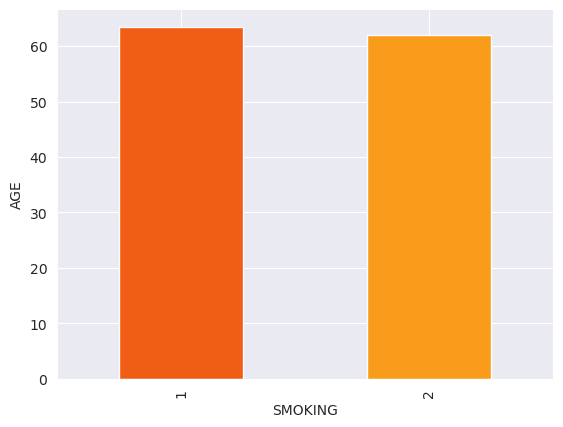

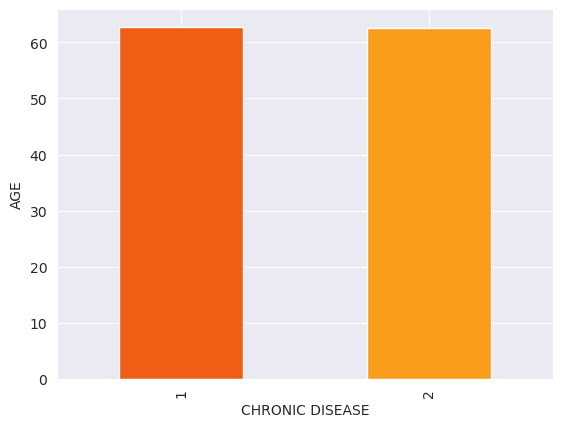

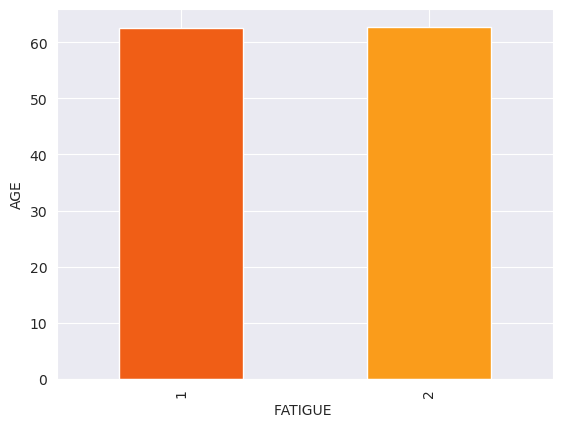

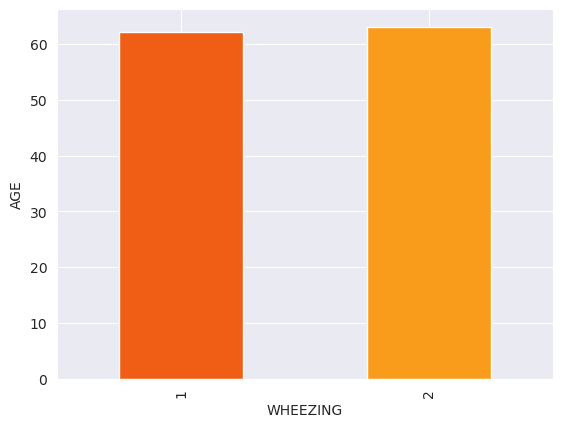

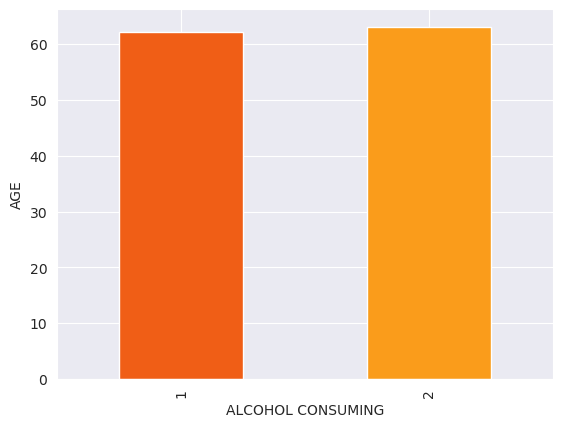

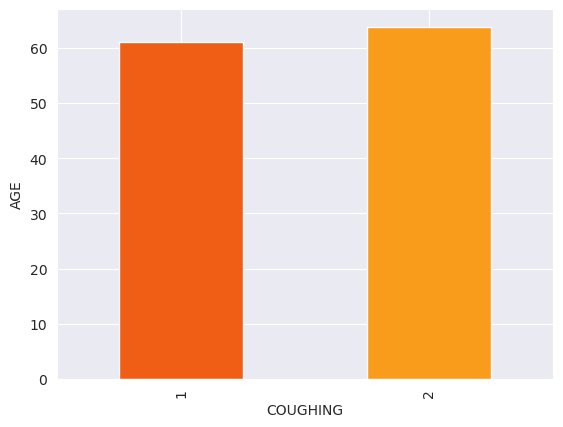

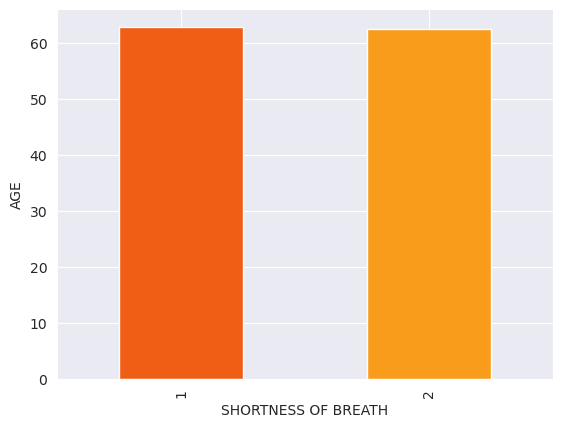

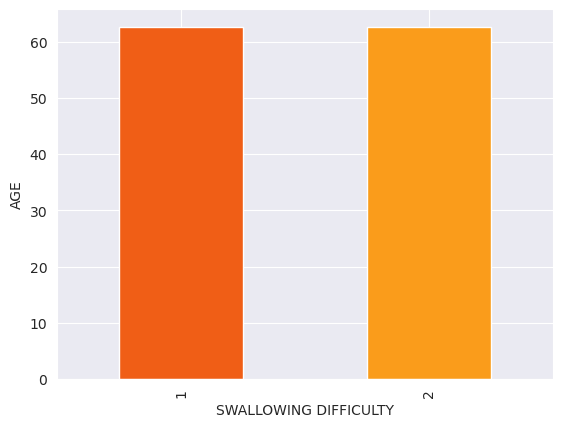

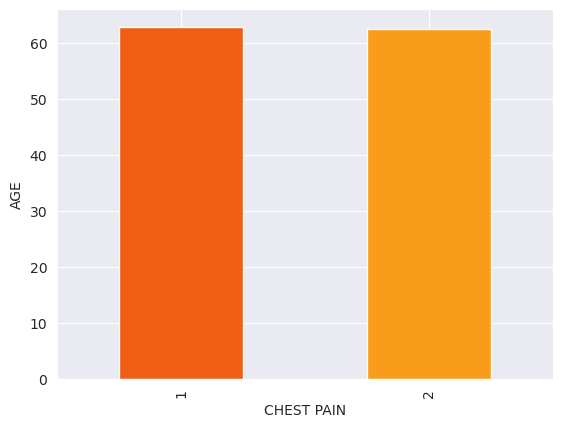

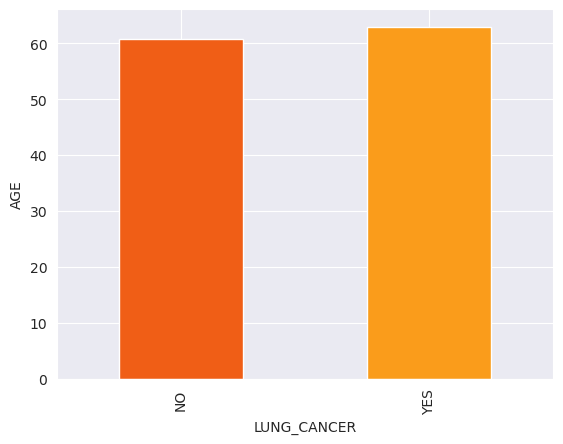

In [32]:
names = ['SMOKING', 'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
for i in names:
    df.groupby(i)['AGE'].mean().plot.bar(color = ['#F05E16', '#FA9C1B'])
    plt.xlabel(i)
    plt.ylabel('AGE')
    plt.show()#1 denotes negative for Lung Cancer and 2 denotes 

**Pie Chart of Binary Distribution**

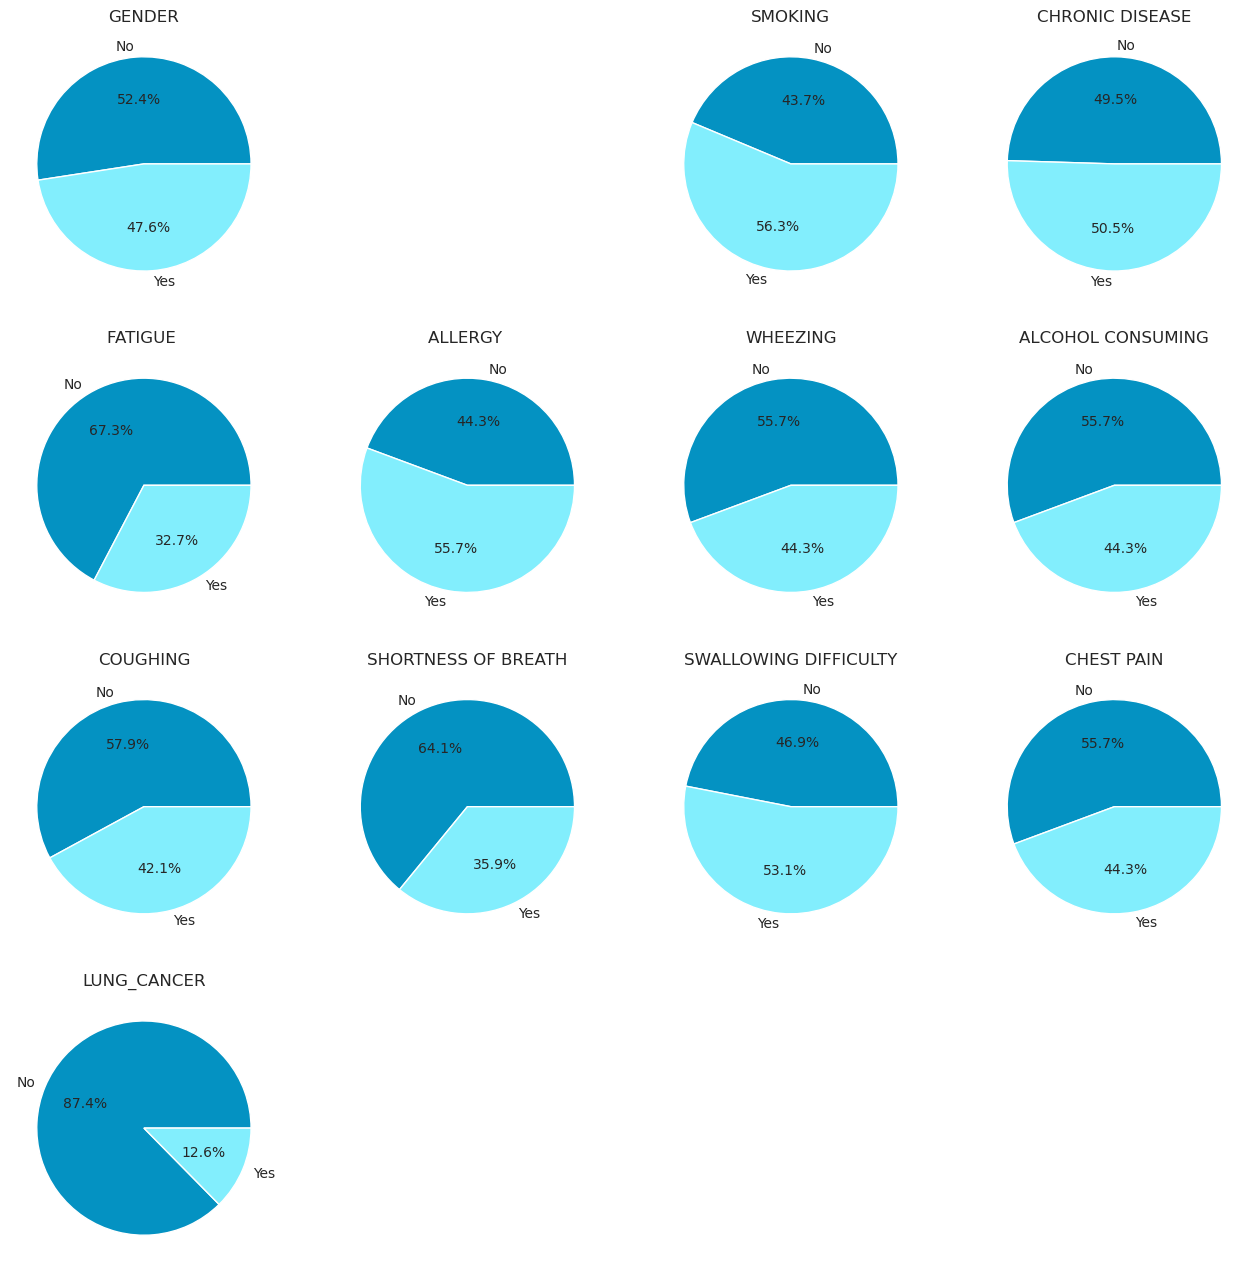

In [25]:


plt.figure(figsize=(16,16))

colors = ['#0492C2', '#82EEFD']  # Define colors for the pie chart slices

for i in range(0, len(df.columns)):
    if i == 1:
        continue
    else:
        plt.subplot(4, 4, i + 1)
        plt.title("{0}".format(df.columns[i]))
        plt.pie(df.iloc[:, i].value_counts(sort=False), labels=['No', 'Yes'], autopct='%.1f%%', colors=colors)

plt.show()


Text(0, 0.5, 'LUNG CANCER')

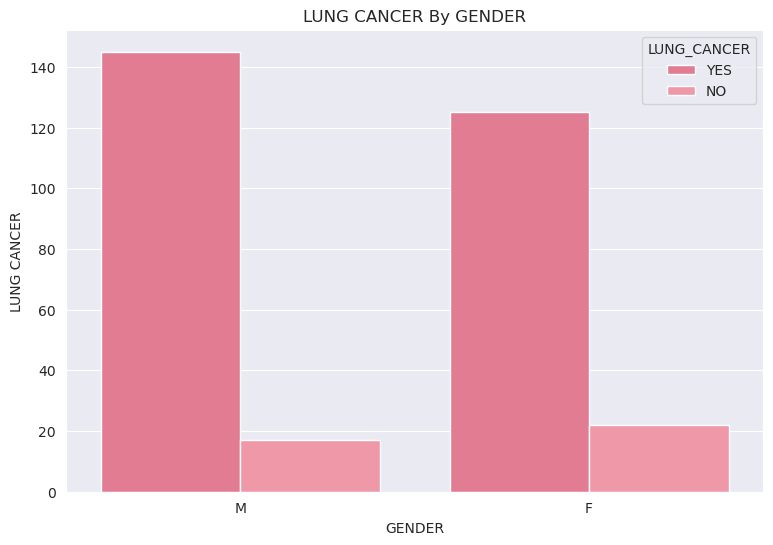

In [27]:
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
sns.countplot(data=df, x="GENDER", hue="LUNG_CANCER", palette= [  '#F26B8A','#FD8A9F'])
plt.title('LUNG CANCER By GENDER')
plt.xlabel("GENDER")
plt.ylabel("LUNG CANCER")


**Multiple Density Estimation Plot Smoking by Age**

Average Age With 62.67313915857605
Average Age Without 62.67313915857605


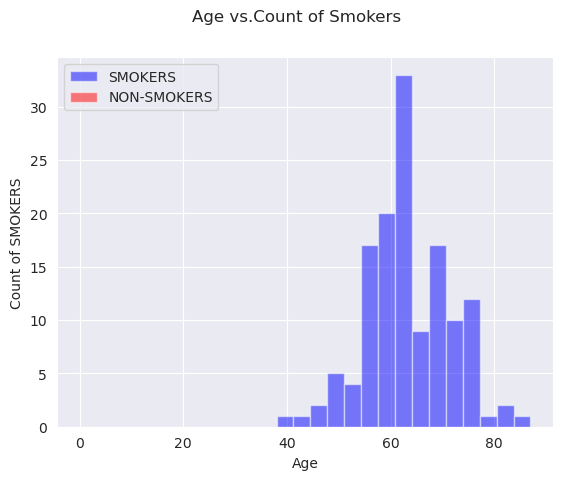

In [40]:
fig, ax = plt.subplots()
ax.hist(df[df["SMOKING"]==1]["AGE"], bins=15, alpha=0.5, color="blue", label="SMOKERS")
ax.hist(df[df["SMOKING"]==0]["AGE"], bins=15, alpha=0.5, color="red", label="NON-SMOKERS")
ax.set_xlabel("Age")
ax.set_ylabel("Count of SMOKERS")
fig.suptitle("Age vs.Count of Smokers")
ax.legend()
print('Average Age With',df['AGE'].mean())
print('Average Age Without',df['AGE'].mean())

****

**Age Distribution of Male Individuals by Lung Cancer**

<Axes: xlabel='AGE', ylabel='Count'>

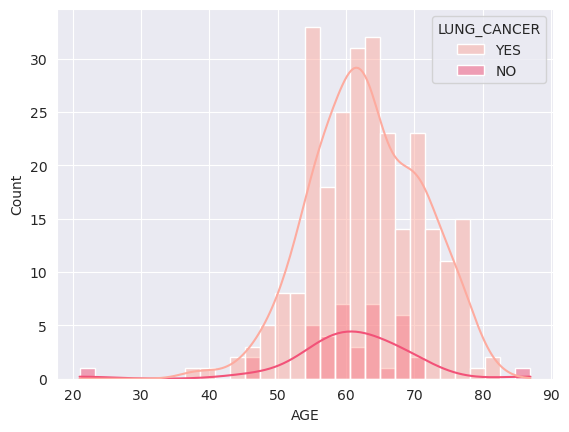

In [47]:
sns.histplot(data=df, x='AGE', bins= 30, color="red", kde=True, hue='LUNG_CANCER',palette=["#FDAB9F", "#F25278"])



**Age Distribution of Male Individuals by Alcohol Consumption**

<Axes: xlabel='AGE', ylabel='Count'>

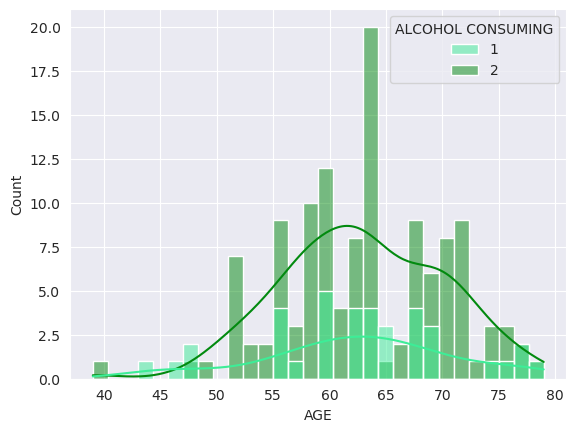

In [48]:
sns.histplot(data=df[df['GENDER']=="M"], x='AGE', bins= 30, kde=True, hue='ALCOHOL CONSUMING', palette=["#3DED97", "#028A0F"])

**Age Distribution of Male Individuals by Smoking**

<Axes: xlabel='AGE', ylabel='Count'>

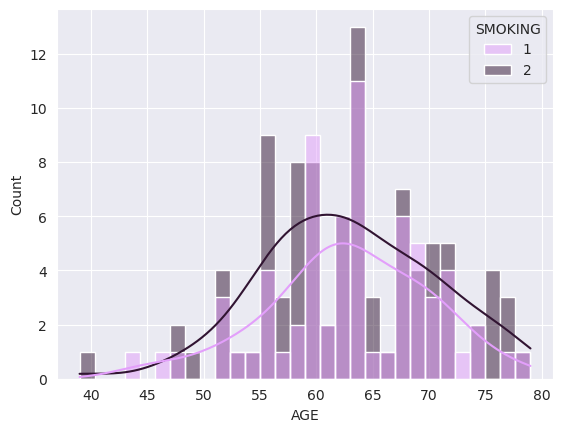

In [49]:
sns.histplot(data=df[df['GENDER']=="M"], x='AGE', bins= 30, kde=True, hue='SMOKING', palette=["#E39FFb", "#311432"])


# BINNING


In [50]:
#The age will be divided into 7 age categories:
#Below 20 y.o.
#0 - 39 y.o.
#40 - 50 y.o.
#51 - 60 y.o.
#61 -70 y.o.
#71 - 80 y.o.
#Above 80.




bin_age = [0, 40, 50, 60, 70, 80, 90 ]
category_age = ['<40s', '40-50', '51-60', '61-70', '71-80', '>80s']
df['Age_binned'] = pd.cut(df['AGE'], bins=bin_age, labels=category_age)
df = df.drop(['AGE'], axis = 1)

#  Data Pre-Processing

In [51]:
#coverting YES  & NO in lung cancer into binary
df=df.replace({'M':0,'F':1})
df = df.replace({'YES':0,'NO':1})
df

,GENDER,SMOKING,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Age_binned
0,0,1,1,2,1,2,2,2,2,2,2,0,61-70
1,0,2,2,2,2,1,1,1,2,2,2,0,71-80
2,1,1,1,2,1,2,1,2,2,1,2,1,51-60
3,0,2,1,1,1,1,2,1,1,2,2,1,61-70
4,1,1,1,1,1,2,1,2,2,1,1,1,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,2,2,1,1,2,2,2,2,1,0,51-60
305,0,2,1,2,2,2,2,2,2,1,2,0,61-70
306,0,2,1,1,2,2,2,2,1,1,2,0,51-60
307,0,2,1,2,2,1,2,2,2,1,2,0,61-70


 **Train-Test Split**

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = df.drop(["LUNG_CANCER"], axis=1)
y = df["LUNG_CANCER"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Engineering

**One Hot Encoding**

In [53]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train.head()

X_test.head()

,GENDER,SMOKING,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Age_binned_<40s,Age_binned_40-50,Age_binned_51-60,Age_binned_61-70,Age_binned_71-80,Age_binned_>80s
63,1,1,2,1,2,2,2,1,1,2,1,0,0,0,1,0,0
231,0,2,1,2,2,1,2,2,2,1,2,0,0,0,1,0,0
167,0,1,2,1,2,1,2,2,2,2,2,0,0,0,1,0,0
159,0,1,2,1,1,1,2,1,1,1,1,0,0,0,1,0,0
189,1,2,1,2,1,1,1,1,1,1,1,0,0,0,1,0,0


# Data Augmentation

**SMOTE Technique ⚒**

In [55]:
# 👉 Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.
from collections import Counter
from sklearn.datasets import make_classification
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)


**Count Representation of Lung Cnacer after Oversampling to Balance Data**

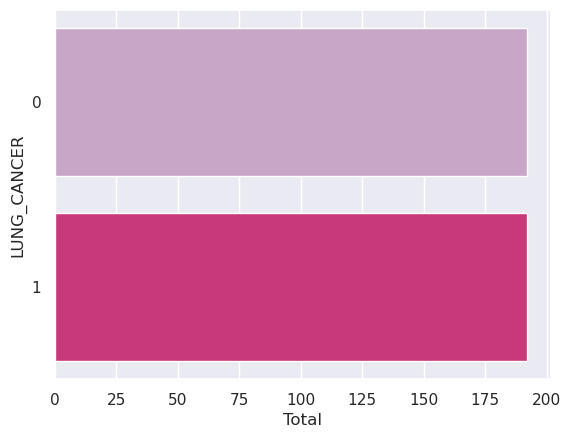

In [57]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette='PuRd')
plt.ylabel('LUNG_CANCER')
plt.xlabel('Total')
plt.show()

# Modelling

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier



In [60]:
models = {
    '  Logistic Regression': LogisticRegression(),
    '           Linear SVM': LinearSVC(),
    '        Decision Tree': DecisionTreeClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier()
}

for name, model in models.items():
          model = model.fit(X_train, y_train)
          print(name + " trained")




  Logistic Regression trained
           Linear SVM trained
        Decision Tree trained
    Gradient Boosting trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained


In [61]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))
  

  Logistic Regression: 90.32%
           Linear SVM: 89.25%
        Decision Tree: 87.10%
    Gradient Boosting: 89.25%
        Random Forest: 87.10%
 KNeighborsClassifier: 83.87%
   Bagging Classifier: 84.95%
